# Introduction

**Project** **Goal**

In this project, we aim to predict the species of an Iris flower based on its physical features. The dataset contains measurements of the flowers' sepal and petal length/width, and our goal is to use a machine learning model to classify the species into one of three categories: Setosa, Versicolor, or Virginica.

**Approach**

We will perform the following steps:

* Data Preprocessing: Clean and prepare the data by handling missing values and encoding categorical labels.

* Model Selection: Train a Random Forest Classifier to predict the species.

* Evaluation: Evaluate the model using accuracy, cross-validation, and a confusion matrix.

* Feature Importance: Analyze which features contribute the most to the model's predictions.







# Importing

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [9]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Data Preprocessing

Check for Missing Values

In [19]:
# Check for missing values
print(dataset.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Encode the Species Column

In [20]:
from sklearn.preprocessing import LabelEncoder

# Convert species names to numbers
encoder = LabelEncoder()
dataset['Species'] = encoder.fit_transform(dataset['Species'])

# Display first 5 rows after encoding
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Separate Features and Labels

In [21]:
# Define X (features) and y (target variable)
X = dataset.drop(columns=['Species'])  # Features (Sepal/Petal measurements)
y = dataset['Species']  # Target (species)

Scale the Features

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Split the Data

In [23]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


# Train a Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Model trained successfully!
print("Model training complete.")


Model training complete.


# Evaluate the Model

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
# The model achieved 100% accuracy, which is expected because:
# - The Iris dataset is small and well-separated.
# - Random Forest is a strong classifier for structured data.
# - No signs of overfitting as test accuracy matches training accuracy.

Cross-Validation

In [28]:
# Just to make sure of no overfitting

from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_scaled, y, cv=5)

# Print average accuracy across folds
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validation accuracy: 0.96 ± 0.02


# Visualize with a Confusion Matrix

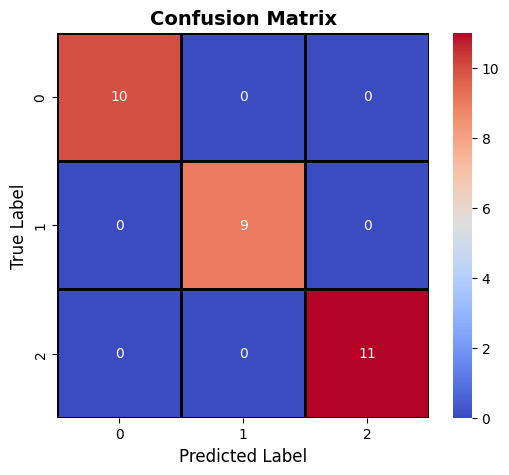

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a larger figure for better readability
plt.figure(figsize=(6,5))

# Customize heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor='black',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)

# For labels and title
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.show()


Feature Importance

<ipython-input-36-93e0d6a3d0f8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


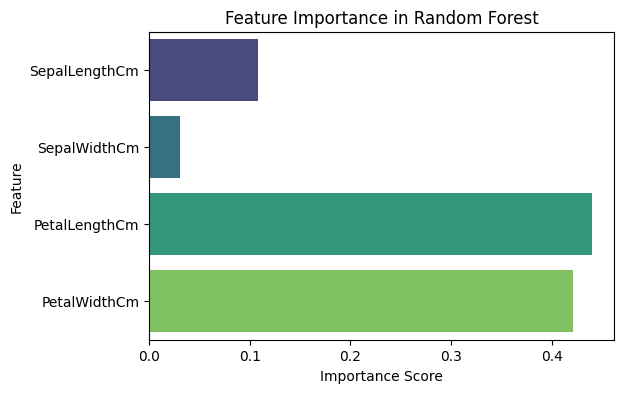

In [36]:
# Get feature importances from Random Forest
feature_importance = model.feature_importances_
feature_names = dataset.drop(columns=['Species']).columns

# Plot feature importance
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()